# **Install Alpaca and apscheduler**

In [1]:
!pip install alpaca_trade_api
!pip install apscheduler

     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 204kB 14.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ad/f3/94/a1870dd76b1c335e6180ff67d6ab8deb236004e45682814369
Successfully built asyncio-nats-client


# **Imports**

In [0]:
# Mass Imports
import datetime
import operator
import csv

import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import time as time
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

# Specific Imports
from apscheduler.schedulers.background import BackgroundScheduler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# **Connect Google Drive**

In [3]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Load CSV Data**

In [0]:
# Path Variables
path01 = "drive/My Drive/658Project/AAPL_6M_2004_6_1MIN.csv"
path02 = "drive/My Drive/658Project/AAPL_6M_2004_12_1MIN.csv"
path03 = "drive/My Drive/658Project/AAPL_6M_2005_6_1MIN.csv"
path04 = "drive/My Drive/658Project/AAPL_6M_2005_12_1MIN.csv"
path05 = "drive/My Drive/658Project/AAPL_6M_2006_6_1MIN.csv"
path06 = "drive/My Drive/658Project/AAPL_6M_2006_12_1MIN.csv"
path07 = "drive/My Drive/658Project/AAPL_6M_2007_6_1MIN.csv"
path08 = "drive/My Drive/658Project/AAPL_6M_2007_12_1MIN.csv"
path09 = "drive/My Drive/658Project/AAPL_6M_2008_6_1MIN.csv"
path10 = "drive/My Drive/658Project/AAPL_6M_2008_12_1MIN.csv"
path11 = "drive/My Drive/658Project/AAPL_6M_2009_6_1MIN.csv"
path12 = "drive/My Drive/658Project/AAPL_6M_2009_12_1MIN.csv"
path13 = "drive/My Drive/658Project/AAPL_6M_2010_6_1MIN.csv"
path14 = "drive/My Drive/658Project/AAPL_6M_2010_12_1MIN.csv"
path15 = "drive/My Drive/658Project/AAPL_6M_2011_6_1MIN.csv"
path16 = "drive/My Drive/658Project/AAPL_6M_2011_12_1MIN.csv"
path17 = "drive/My Drive/658Project/AAPL_6M_2012_6_1MIN.csv"
path18 = "drive/My Drive/658Project/AAPL_6M_2012_12_1MIN.csv"
path19 = "drive/My Drive/658Project/AAPL_6M_2013_6_1MIN.csv"
path20 = "drive/My Drive/658Project/AAPL_6M_2013_12_1MIN.csv"
path21 = "drive/My Drive/658Project/AAPL_6M_2014_6_1MIN.csv"
path22 = "drive/My Drive/658Project/AAPL_6M_2014_12_1MIN.csv"
path23 = "drive/My Drive/658Project/AAPL_6M_2015_6_1MIN.csv"
path24 = "drive/My Drive/658Project/AAPL_6M_2015_12_1MIN.csv"
path25 = "drive/My Drive/658Project/AAPL_6M_2016_6_1MIN.csv"
path26 = "drive/My Drive/658Project/AAPL_6M_2016_12_1MIN.csv"
path27 = "drive/My Drive/658Project/AAPL_6M_2017_6_1MIN.csv"
path28 = "drive/My Drive/658Project/AAPL_6M_2017_12_1MIN.csv"
path29 = "drive/My Drive/658Project/AAPL_6M_2018_6_1MIN.csv"
path30 = "drive/My Drive/658Project/AAPL_6M_2018_12_1MIN.csv"
path31 = "drive/My Drive/658Project/AAPL_6M_2019_6_1MIN.csv"
newHistoricalDataPath = "drive/My Drive/658Project/newHistoricalData.csv"

In [0]:
# Data Files
csvList = []
csv01 = pd.read_csv(path01, parse_dates=['Date'])
csvList.append(csv01)
csv02 = pd.read_csv(path02, parse_dates=['Date'])
csvList.append(csv02)
csv03 = pd.read_csv(path03, parse_dates=['Date'])
csvList.append(csv03)
csv04 = pd.read_csv(path04, parse_dates=['Date'])
csvList.append(csv04)
csv05 = pd.read_csv(path05, parse_dates=['Date'])
csvList.append(csv05)
csv06 = pd.read_csv(path06, parse_dates=['Date'])
csvList.append(csv06)
csv07 = pd.read_csv(path07, parse_dates=['Date'])
csvList.append(csv07)
csv08 = pd.read_csv(path08, parse_dates=['Date'])
csvList.append(csv08)
csv09 = pd.read_csv(path09, parse_dates=['Date'])
csvList.append(csv09)
csv10 = pd.read_csv(path10, parse_dates=['Date'])
csvList.append(csv10)
csv11 = pd.read_csv(path11, parse_dates=['Date'])
csvList.append(csv11)
csv12 = pd.read_csv(path12, parse_dates=['Date'])
csvList.append(csv12)
csv13 = pd.read_csv(path13, parse_dates=['Date'])
csvList.append(csv13)
csv14 = pd.read_csv(path14, parse_dates=['Date'])
csvList.append(csv14)
csv15 = pd.read_csv(path15, parse_dates=['Date'])
csvList.append(csv15)
csv16 = pd.read_csv(path16, parse_dates=['Date'])
csvList.append(csv16)
csv17 = pd.read_csv(path17, parse_dates=['Date'])
csvList.append(csv17)
csv18 = pd.read_csv(path18, parse_dates=['Date'])
csvList.append(csv18)
csv19 = pd.read_csv(path19, parse_dates=['Date'])
csvList.append(csv19)
csv20 = pd.read_csv(path20, parse_dates=['Date'])
csvList.append(csv20)
csv21 = pd.read_csv(path21, parse_dates=['Date'])
csvList.append(csv21)
csv22 = pd.read_csv(path22, parse_dates=['Date'])
csvList.append(csv22)
csv23 = pd.read_csv(path23, parse_dates=['Date'])
csvList.append(csv23)
csv24 = pd.read_csv(path24, parse_dates=['Date'])
csvList.append(csv24)
csv25 = pd.read_csv(path25, parse_dates=['Date'])
csvList.append(csv25)
csv26 = pd.read_csv(path26, parse_dates=['Date'])
csvList.append(csv26)
csv27 = pd.read_csv(path27, parse_dates=['Date'])
csvList.append(csv27)
csv28 = pd.read_csv(path28, parse_dates=['Date'])
csvList.append(csv28)
csv29 = pd.read_csv(path29, parse_dates=['Date'])
csvList.append(csv29)
csv30 = pd.read_csv(path30, parse_dates=['Date'])
csvList.append(csv30)
csv31 = pd.read_csv(path31, parse_dates=['Date'])
csvList.append(csv31)

In [0]:
# Combine Data Files
rawData = pd.concat(csvList)

In [0]:
# Create Historical Data File Header
header = [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Create Historical Data File
with open(newHistoricalDataPath, 'w') as fs:
  writer = csv.writer(fs)
  writer.writerows(header)

# Close Historical Data File
fs.close()

# **Format Data**

In [0]:
# Get rid of weighted average and trades, not used in this application
del rawData['Avg']
del rawData['Trades']

In [0]:
# Re-order columns to match Alpaca ordering for easier model use later
orderedData = rawData[['Close', 'Date', 'Open', 'High', 'Low', 'Volume']]

In [13]:
# Create Feature and Stock Data
# Feature data will be date, high, low, open, trades, and volume
# Stock data will be close since it's most important
featureData = orderedData[['Date', 'Open', 'High', 'Low', 'Volume']]
stockData = orderedData[['Close']]

# Convert datetime to float
featureData['Date'] = featureData['Date'].apply(lambda x: x.timestamp())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# **Split Train and Test Data**

In [0]:
# Split data in 50/50 parts for train and test
featureSplits = np.array_split(featureData, 2)
stockSplits = np.array_split(stockData, 2)

# Assign X_train, y_train, X_test, and y_test
X_train = featureSplits[0]
X_test = featureSplits[1]
y_train = stockSplits[0]
y_test = stockSplits[1]

# Assign to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Get n values for future use
n = X_train.shape[0]

# **Convert Features to Polynomial Representation**

In [0]:
# Use built in functions
# 3rd degree -- 77% Test Accuracy
# 4th degree -- 16% Test Accuracy
# 2nd degree -- 96% Test Accuracy
polynomial_features = PolynomialFeatures(degree=2)
X_train_p = polynomial_features.fit_transform(X_train)
X_test_p = polynomial_features.fit_transform(X_test)

# **Polynomial Regression Model**

0.0891313978708115
0.9999590922072575


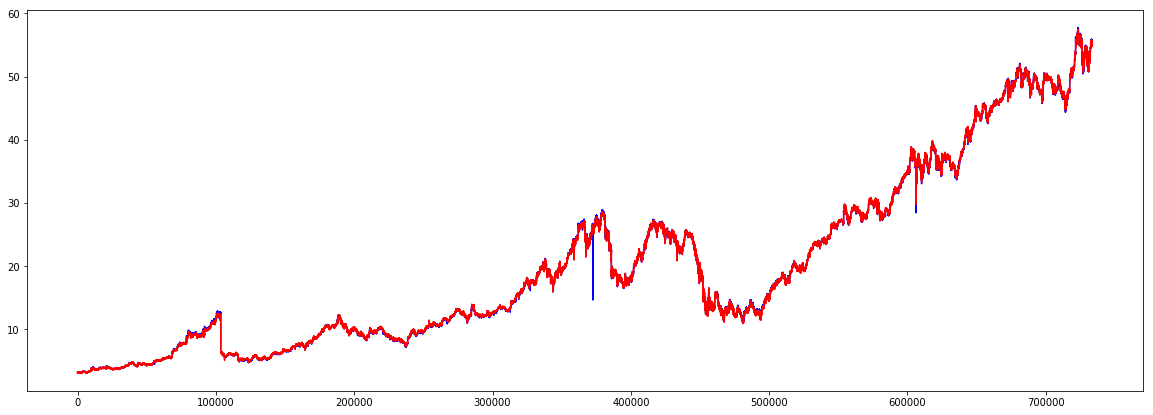

In [16]:
# Train model on data
model = LinearRegression()
model.fit(X_train_p, y_train)

# Check training data for accuracy
y_train_pred = model.predict(X_train_p)

# Calculate Accuracy
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print(rmse)
print(r2)

# Graph Results
fig = plt.figure(figsize=(20,7))
plt.plot(range(0,n),y_train, c='blue')
plt.plot(range(0,n),y_train_pred,c='red')
plt.show()

# **Polynomial Regression Validation Data**

[174.47131504]
7.743687892989993
0.967033104037464


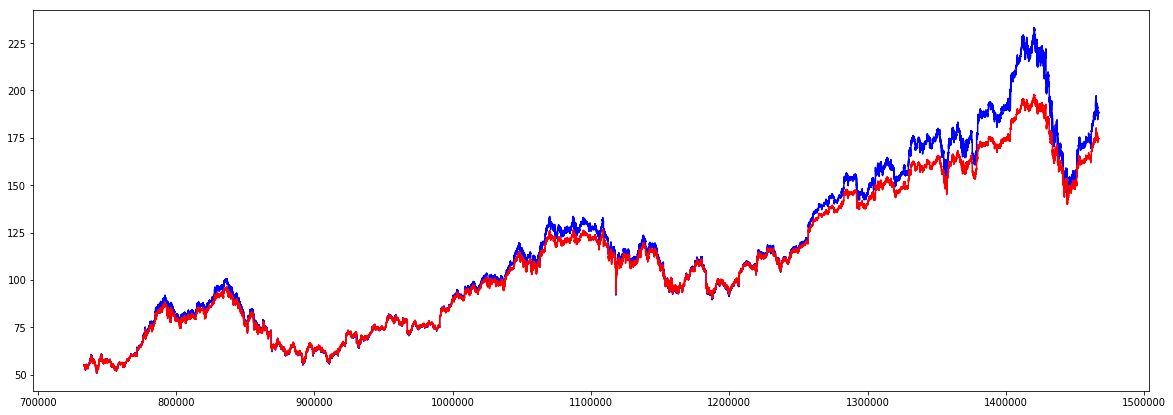

In [17]:
# Check testing data for accuracy
y_test_pred = model.predict(X_test_p)

print(y_test_pred[y_test_pred.size-1])

# Calculate accuracy
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)
print(rmse)
print(r2)

# Graph Results
fig = plt.figure(figsize=(20,7))
plt.plot(range(n,2*n),y_test, c='blue')
plt.plot(range(n,2*n), y_test_pred, c='red')
plt.show()

# **Setup Alpaca API**

In [0]:
api = tradeapi.REST(
  key_id='PK9CLKJ7ADR68H57IIT1',
  secret_key='5hSlFYvqe8qAALViFiUZrPxkc2pNZvblb3txwUXH',
  base_url='https://paper-api.alpaca.markets'
)

# **Historical Data Collection Function**

In [0]:
# Store market data when the market is open
def collectHistorical():
  # Get current time
  clock = api.get_clock()
  
  # Check if market is open
  if clock.is_open:
    
    # Collect Data
    currentData = list(api.get_barset('AAPL', 'minute', limit=1)['AAPL'][0].__dict__['_raw'].values())
    
    # Write to CSV
    with open(newHistoricalDataPath, 'a') as fs:
      writer = csv.writer(fs)
      writer.writerow(currentData)
      
    # Close CSV
    fs.close()

# **Portfolio Management Function**

In [0]:
# Manage an AAPL portfolio
def AAPLmanagement():
  
  # Get current time
  clock = api.get_clock()
  
  # Check if market is open
  if clock.is_open:
    
    # Get account information
    buyingPower = api.get_account().buying_power

    # Pad buying power by 10%, never wanna lose alll the money
    buyingPower = float(buyingPower)*0.9


    # Get data from Alpaca
    curData = list(api.get_barset('AAPL', 'minute', limit=1)['AAPL'][0].__dict__['_raw'].values())

    # Predict close value
    actClose = curData[4]
    curData = np.array(curData)
    curData = np.delete(curData, [4])

    curData_poly = polynomial_features.fit_transform(curData.reshape(1, -1))
    predClose = model.predict(curData_poly)

    # Append prediction to historical list
    prediction = (curData[0], predClose)
    predictionHistory.append(prediction)

    # Calculate buying power
    maxBuy = np.floor(buyingPower/actClose)

    # Decide if it should buy, sell, or hold
    if len(predictionHistory) == 1:
      # Buy original shares price doesn't matter
      api.submit_order(symbol = 'AAPL',
                  qty = maxBuy,
                  side = 'buy',
                  type = 'market',
                  time_in_force='day')
    else:
      # Check previous prediction vs. current
      difference = predictionHistory[len(predictionHistory)-2][1] - predictionHistory[len(predictionHistory)-1][1]

      if (difference == 0):
        if len(api.list_positions()) == 0:
          api.submit_order(symbol = 'AAPL',
                  qty = maxBuy,
                  side = 'buy',
                  type = 'market',
                  time_in_force='day')
        else:
          return
      else:
        if len(api.list_positions()) == 0:
          if difference > 0:
            api.submit_order(symbol = 'AAPL',
                  qty = maxBuy,
                  side = 'sell',
                  type = 'market',
                  time_in_force='day')
          else:
            api.submit_order(symbol = 'AAPL',
                  qty = maxBuy,
                  side = 'buy',
                  type = 'market',
                  time_in_force='day')
        else:
          lastOrder = api.list_positions()
          lastSide = lastOrder[0].side
          if lastSide == 'long':
            if difference > 0:
              return
            else:
              api.submit_order(symbol = 'AAPL',
                    qty = lastOrder[0].qty,
                    side = 'sell',
                    type = 'market',
                    time_in_force='day')
          else:
            if difference > 0:
              api.submit_order(symbol = 'AAPL',
                    qty = maxBuy,
                    side = 'buy',
                    type = 'market',
                    time_in_force='day')
            else:
              return

# **Schedule Jobs**

In [0]:
# Build background scheduler
scheduler = BackgroundScheduler()

# Start scheduler
scheduler.start()

# Add historical data job every minute
dataJob = scheduler.add_job(collectHistorical, trigger='cron', second=0)

# Add portfolio management job every 59th second
AAPLJob = scheduler.add_job(AAPLmanagement, trigger='cron', second=59)

In [26]:
# View Current jobs
scheduler.print_jobs()

Jobstore default:
    AAPLmanagement (trigger: cron[second='59'], next run at: 2019-05-16 04:15:59 UTC)
    collectHistorical (trigger: cron[second='0'], next run at: 2019-05-16 04:16:00 UTC)
